**Описание проекта**  
Проводим иследования для  интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.  
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## **Изучение общей информации**

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from pymystem3 import Mystem
m = Mystem()
sns.set()
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_columns = 100


In [2]:
df = pd.read_csv('/datasets/games.csv') 

In [3]:
df.head() 

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Name — название игры  
Platform — платформа  
Year_of_Release — год выпуска  
Genre — жанр игры  
NA_sales — продажи в Северной Америке (миллионы проданных копий)  
EU_sales — продажи в Европе (миллионы проданных копий)  
JP_sales — продажи в Японии (миллионы проданных копий)  
Other_sales — продажи в других странах (миллионы проданных копий)  
Critic_Score — оценка критиков (максимум 100)  
User_Score — оценка пользователей (максимум 10)  
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## **Подготовка данных**

### Работа со столбцами

In [5]:
# Приводим к нижнему регистру
df.columns = df.columns.str.lower()

In [6]:
# Проверяем пропуски
df.isna().sum()


name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [7]:
# Посчитаем пропуски там где их больше всего 
print('В столбце critic_score',round(8578/16715*100),'% пропусков')
print('В столбце user_score',round(6701/16715*100),'% пропусков')
print('В столбце rating ',round(6766/16715*100),'% пропусков')

В столбце critic_score 51 % пропусков
В столбце user_score 40 % пропусков
В столбце rating  40 % пропусков


In [8]:
#смотрим уникальные значения
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [9]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Итоги по пропускам:  
Изучив информацию об организации ESRB не все типы рейтингов появились с начала основания организации. Так же в наших данных есть игры, которые появились раньше. Отсюда объясняется такое большое количество пропусков. Заменять их будем на «no_ rating»  
Пропуски в столбцах 'critic_score' и 'user_score' (оценка критиков и оценка пользователей) заполнять медианой ли средне не буду, т.к. показатели очень субъективные.  
В столбце 'user_score' значение аббревиатура 'tbd'. Что она означает?  
Ответ из просторов интернета: «TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований.»  
Следовательно, если  «будет определено» или «будет решено», то как токового решения нет, а если нет то заменяем все  'tbd' на Nan  
В столбцах «name», «genre» количество пропусков незначительно, на исследование они не повлияют, заполнять их не будем.

In [10]:
#заменяем все 'tbd' на nan
df['user_score'] = df['user_score'].replace('tbd', np.nan)
# меняем тип данных на 'float64'
df['user_score'] = df['user_score'].astype('float64')

In [11]:
df['rating'] = df['rating'].fillna('no_rating')

In [12]:
# в столбце year_of_release не корректно отображён год выпуска, меняем на целочисленный, перед этим заменю пропуски на "0"  
df['year_of_release'] = df['year_of_release'].fillna(0).astype('Int64')

In [13]:
#Добавим столбец суммырных продаж  во всех регионах и запишим их в отдельный столбец.
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [14]:
# смотрим что получилось.
display(df)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,no_rating,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,no_rating,0.01


## **Исследовательский анализ данных**

### Количество игр выпущенных в разные годы

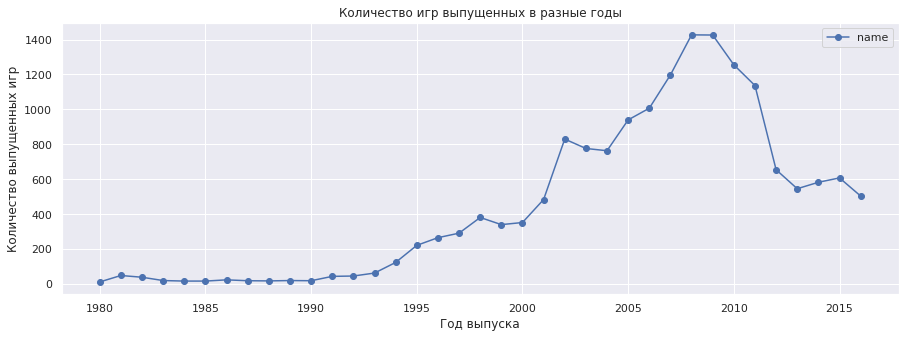

In [15]:
df.pivot_table(index= (df.query('year_of_release != 0')['year_of_release']),
               values= 'name',aggfunc='count').plot( style='o-', figsize=(15, 5))

plt.title('Количество игр выпущенных в разные годы')
plt.xlabel('Год выпуска')
plt.ylabel('Количество выпущенных игр')

plt.show()


### Популярные платформы

Text(0, 0.5, 'Количество продаж')

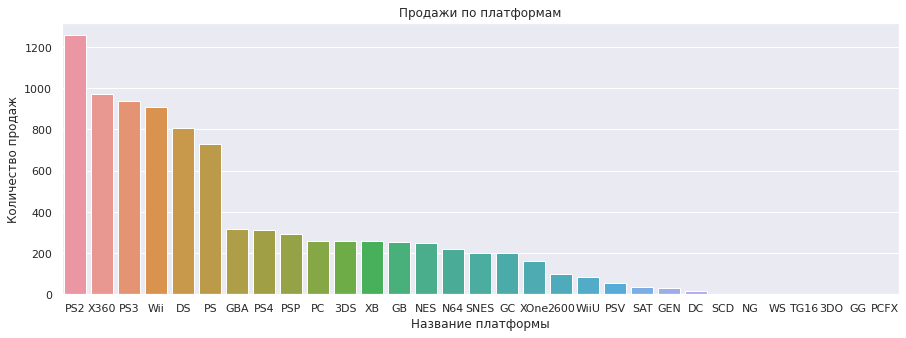

In [16]:
platform = df.pivot_table(index ='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
plt.figure(figsize=(15,5))
sns.barplot(x = platform.index, y = platform['total_sales'])
plt.title('Продажи по платформам')
plt.xlabel('Название платформы')
plt.ylabel('Количество продаж')


Самыми популярными платформами за весь период (1980-2016) - это 'X360','PS3','Wii','DS', 'PS2', 'PS'

### Динамика по продажам

In [17]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

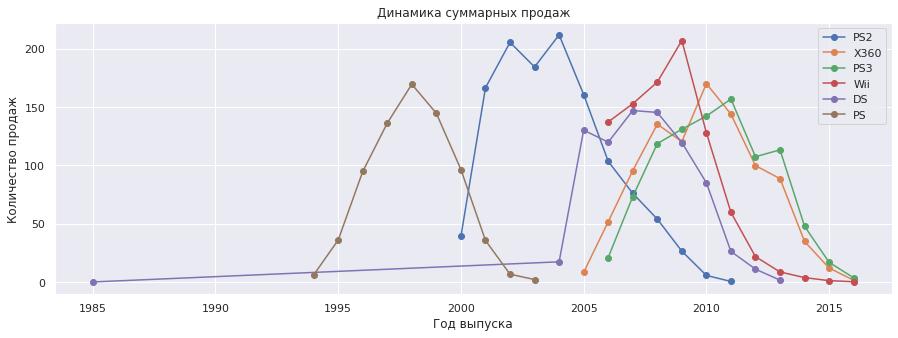

In [18]:
# Выбираем платформы с наибольшими суммарными продажами 
# смотрим распредиление по самым популярным платформам
PS2 = df[df['platform'] =='PS2'].pivot_table(index = (df.query('year_of_release != 0')['year_of_release']), values = 'total_sales',aggfunc='sum')
PS2.columns = ['PS2']
PS2 = PS2.plot(style='o-')

X360 = df[df['platform'] =='X360'].pivot_table(index = (df.query('year_of_release != 0')['year_of_release']), values = 'total_sales',aggfunc='sum')
X360.columns = ['X360']
X360 = X360.plot(ax = PS2,style='o-' )

PS3 = df[df['platform'] =='PS3'].pivot_table(index = (df.query('year_of_release != 0')['year_of_release']), values = 'total_sales',aggfunc='sum')
PS3.columns = ['PS3']
PS3 = PS3.plot(ax = PS2,style='o-' )
 
Wii = df[df['platform'] =='Wii'].pivot_table(index = (df.query('year_of_release != 0')['year_of_release']), values = 'total_sales',aggfunc='sum')
Wii.columns = ['Wii']
Wii = Wii.plot(ax = PS2,style='o-' )

DS = df[df['platform'] =='DS'].pivot_table(index = (df.query('year_of_release != 0')['year_of_release']), values = 'total_sales',aggfunc='sum')
DS.columns = ['DS']
DS = DS.plot(ax = PS2,style='o-' )

PS = df[df['platform'] =='PS'].pivot_table(index = (df.query('year_of_release != 0')['year_of_release']), values = 'total_sales',aggfunc='sum')
PS.columns = ['PS']
PS = PS.plot(ax = PS2, style='o-', figsize=(15, 5) )

plt.title('Динамика суммарных продаж')
plt.xlabel('Год выпуска')
plt.ylabel('Количество продаж')
plt.show()

Цикл жизни игровых платформ составляет от 10 до 12 лет.  
Как человек далёкий от компьютерных игр, мене пришлось немного ознакомится с историей геймдева. Оказалось, что в результате кризиса многие игры просто перестали существовать, а разработка новых сошла на «эконом» режим. Поэтому для дальнейшего исследования будем брать период начиная с 2009 г. 
Самые стойкие платформы это Xbox 360, Nintendo Wii,PlayStation 3, но не смотря на стойкость, продажи падают. По динамике  к 2016 г. они занимают примерно одинаковую позицию.

In [19]:
#Таблица по платформам за 2014 - 2016г.
df_pl = df[df['year_of_release'] > 2014]
df_pl.head() 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_rating,14.63
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.00,4.30,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,no_rating,7.98
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.00,5.00,E,7.60
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,no_rating,7.39


In [20]:
tmp = df[df['year_of_release'] > 2014]

tmp.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_rating,14.63
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.00,4.30,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,no_rating,7.98
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.00,5.00,E,7.60
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,no_rating,7.39


In [21]:
tmp.shape

(1108, 12)

In [22]:
tmp_groupby = tmp.groupby(by=['platform'],as_index=False).agg({'total_sales': 'sum'}).sort_values(by=['total_sales'], ascending=False)

tmp_groupby

,platform,total_sales
3,PS4,188.15
9,XOne,86.29
0,3DS,42.92
7,WiiU,20.95
2,PS3,20.42
1,PC,13.77
8,X360,13.48
5,PSV,10.50
6,Wii,1.32
4,PSP,0.12


In [23]:
top_5_platforms = tmp_groupby.index[:6].tolist()

top_5_platforms

[3, 9, 0, 7, 2, 1]

In [24]:
top_5_platform = df_pl[df_pl['platform'].isin(['PS4', 'XOne', '3DS', 'WiiU', 'PS3', 'PC'])]
top_5_platform.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_rating,14.63
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.00,4.30,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,no_rating,7.98
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.00,5.00,E,7.60
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,no_rating,7.39


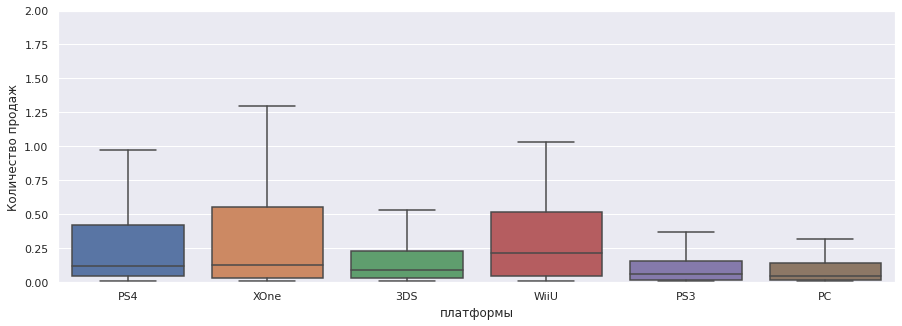

In [25]:
plt.figure(figsize=(15,5))
sns.boxplot(data = top_5_platform , x = 'platform', y = 'total_sales',showfliers=False)
plt.xlabel('платформы')
plt.ylabel('Количество продаж')
plt.ylim(0,2)
plt.show()

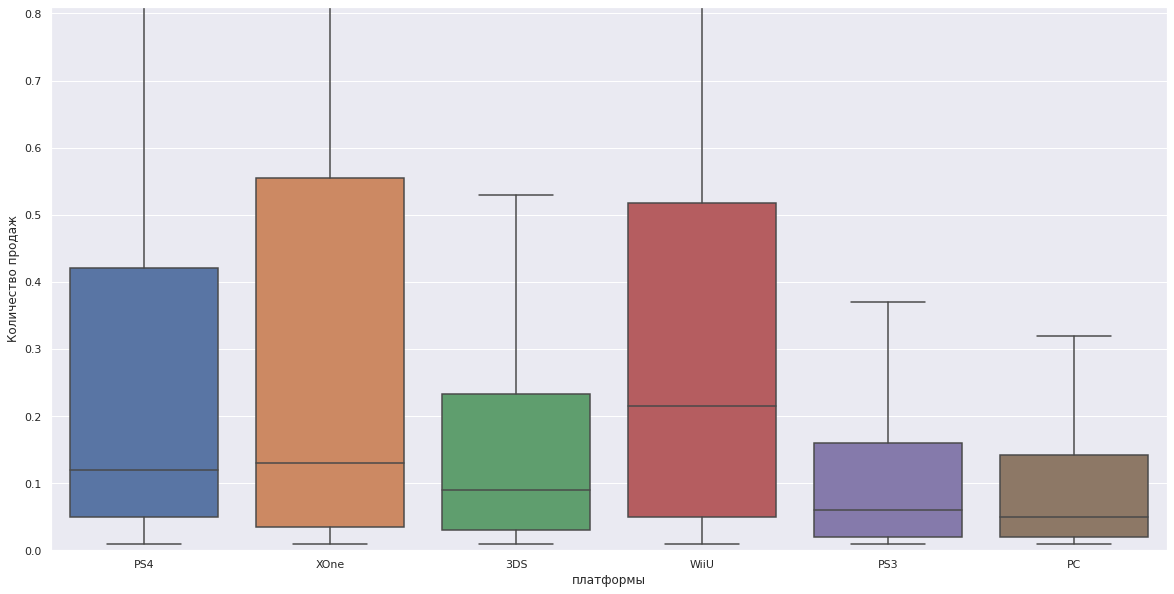

In [26]:
plt.figure(figsize=(20, 10))

sns.boxplot(data = top_5_platform , x = 'platform', y = 'total_sales',showfliers=False)

plt.xlabel('платформы')
plt.ylabel('Количество продаж')

plt.ylim(0, .81)

plt.show()

Межквартильный размах у всех разный.  
Из общей картины особенно выделяются 'WiiU' и 'XOne' как платформы с наибольшими продажами. Широкий диапазон этих платформ нам говорит о разнообразии показателей. Но все-таки "ящики" у этих платформ тоже находятся в нижней части, то есть показатели здесь увы падают.  
Узкий диапазон остальных платформ показывает, что показатели по продажам не сильно менялись, а их расположение ближе к нулю, что продажи постепенно сошли на нет.  



In [27]:
# посмотрим также на средние значения
top_5_platform.groupby('platform')['total_sales'].describe().sort_values( by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
PS4,301.00,0.63,1.46,0.01,0.05,0.12,0.42,14.63
XOne,167.00,0.52,0.97,0.01,0.04,0.13,0.56,7.39
WiiU,42.00,0.50,0.85,0.01,0.05,0.21,0.52,4.44
3DS,132.00,0.33,0.80,0.01,0.03,0.09,0.23,7.14
PS3,111.00,0.18,0.34,0.01,0.02,0.06,0.16,2.70
PC,104.00,0.13,0.21,0.01,0.02,0.05,0.14,1.28


###  Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Строим диаграмму рассеяния и считаем корреляцию между отзывами и продажами.

In [28]:
#платформа и отзывы пользователей.
ps4 = df_pl[df_pl['platform'] == 'PS4']
ps4['user_score'].corr(ps4['total_sales'])

-0.0597384571263821

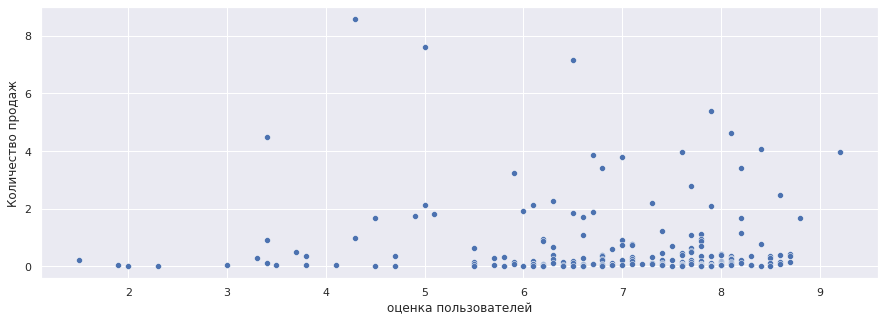

In [29]:
plt.figure(figsize=(15,5))
user = sns.scatterplot(x='user_score', y='total_sales', data= ps4 )
plt.xlabel('оценка пользователей')
plt.ylabel('Количество продаж')
plt.show()

Связь между продажами игр на платформе 'PS4' и отзывами юзеров **практически отсутствует**

In [30]:
#платформа и отзовы кртиков.
ps4 ['critic_score'].corr(ps4 ['total_sales'])

0.39284855551305986

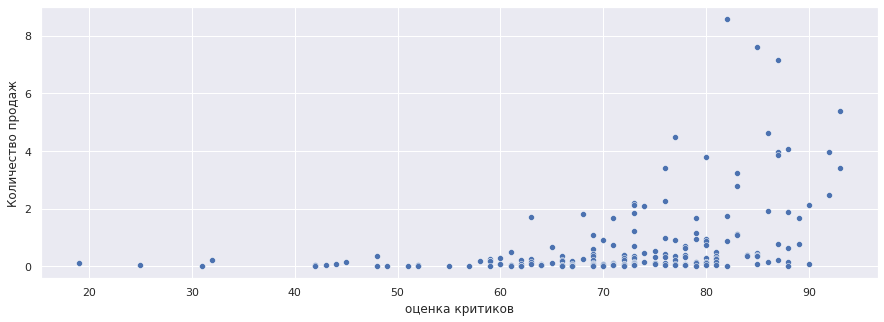

In [31]:
plt.figure(figsize=(15,5))
sns.scatterplot(x ='critic_score', y='total_sales', data= ps4 )
plt.xlabel('оценка критиков')
plt.ylabel('Количество продаж')
plt.show()

Связь между продажами игр на платформе 'PS4' и отзывами критиков  **средняя положительная**

### Соотнесём выводы с продажами игр на других платформах.

In [32]:
# Платформа XOne
xone = df_pl[df_pl['platform'] == 'XOne']
xone['user_score'].corr(xone['total_sales'])

-0.04146733387366271

In [33]:
xone['critic_score'].corr(xone['total_sales'])

0.43088874582136805

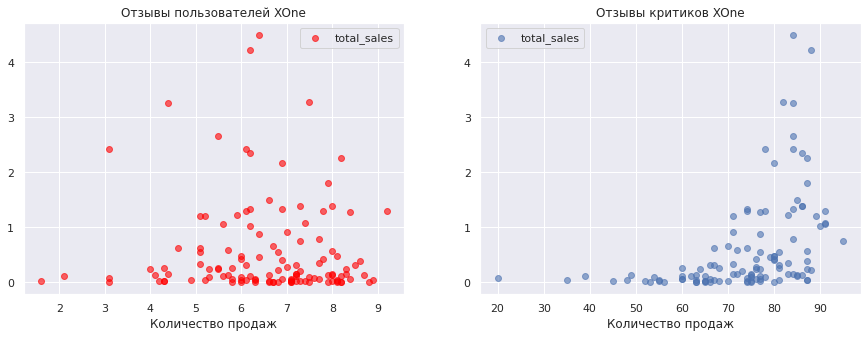

In [34]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
colors = ['red']
ax[0].scatter(x='user_score', y='total_sales', data= xone , c = colors,alpha=0.6)
ax[0].set_title('Отзывы пользователей XOne')
ax[0].set_xlabel('оценка пользователей')
ax[0].set_xlabel('Количество продаж')
ax[0].legend()

ax[1].scatter(x='critic_score', y='total_sales', data= xone,alpha=0.6)
ax[1].set_title('Отзывы критиков XOne')
ax[1].set_xlabel('оценка пользователей')
ax[1].set_xlabel('Количество продаж')
ax[1].legend()
plt.show()

* Связь между продажами игр на платформе 'XOne' и отзывами юзеров **отсутствует**
* Связь между продажами игр на платформе 'XOne' и отзывами критиков  **средняя положительная**


In [35]:
# Платформа WiiU
wiiu = df_pl[df_pl['platform'] == 'WiiU']
wiiu['user_score'].corr(wiiu['total_sales'])

0.3635185724809445

In [36]:
wiiu['critic_score'].corr(wiiu['total_sales'])

0.317045711769622

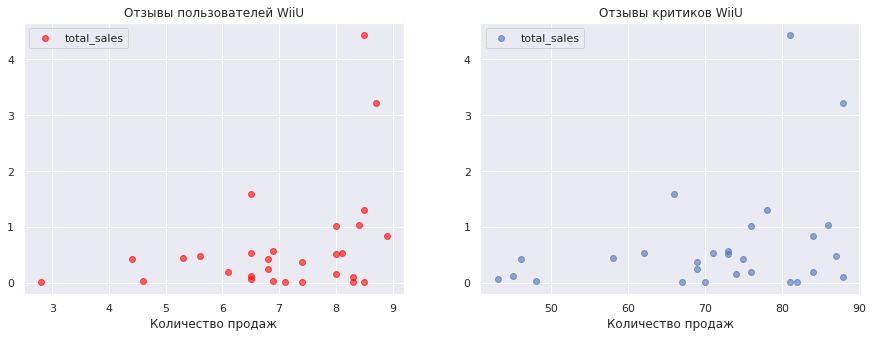

In [37]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
colors = ['red']
ax[0].scatter(x='user_score', y='total_sales', data= wiiu, c = colors,alpha=0.6)
ax[0].set_title('Отзывы пользователей WiiU')
ax[0].set_xlabel('оценка пользователей')
ax[0].set_xlabel('Количество продаж')
ax[0].legend()

ax[1].scatter(x='critic_score', y='total_sales', data= wiiu,alpha=0.6)
ax[1].set_title('Отзывы критиков WiiU')
ax[1].set_xlabel('оценка пользователей')
ax[1].set_xlabel('Количество продаж')
ax[1].legend()
plt.show()

* Связь между продажами игр на платформе 'WiiU' и отзывами юзеров **средняя положительная**
* Связь между продажами игр на платформе 'WiiU' и отзывами критиков  **средняя положительная**

In [38]:
# Платформа 3DS
ds = df_pl[df_pl['platform'] == '3DS']
ds['user_score'].corr(ds['total_sales'])

0.19879627008102982

In [39]:
ds['critic_score'].corr(ds['total_sales'])

0.17757455046092874

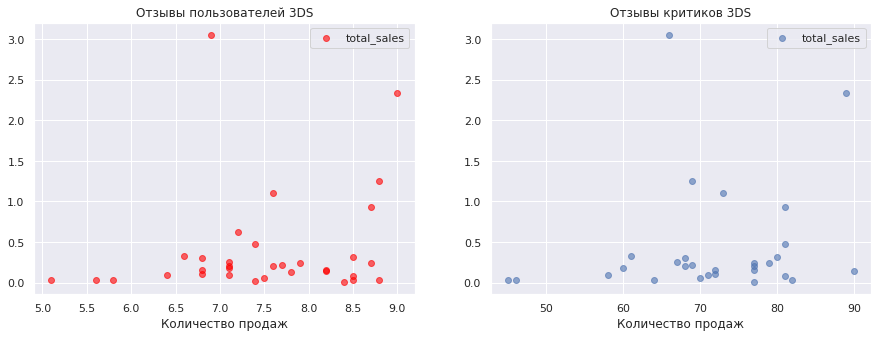

In [40]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
colors = ['red']
ax[0].scatter(x='user_score', y='total_sales', data= ds, c = colors,alpha=0.6)
ax[0].set_title('Отзывы пользователей 3DS')
ax[0].set_xlabel('оценка пользователей')
ax[0].set_xlabel('Количество продаж')
ax[0].legend()

ax[1].scatter(x='critic_score', y='total_sales', data= ds,alpha=0.6)
ax[1].set_title('Отзывы критиков 3DS')
ax[1].set_xlabel('оценка пользователей')
ax[1].set_xlabel('Количество продаж')
ax[1].legend()
plt.show()

* Связь между продажами игр на платформе '3DS' и отзывами юзеров **слабая положительная**
* Связь между продажами игр на платформе '3DS' и отзывами критиков  **слабая положительная**

In [41]:
# Платформа PS3 
ps3 = df_pl[df_pl['platform'] == 'PS3']
ps3['user_score'].corr(ps3['total_sales'])

-0.16529542277898507

In [42]:
ps3['critic_score'].corr(ps3['total_sales'])

/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


nan

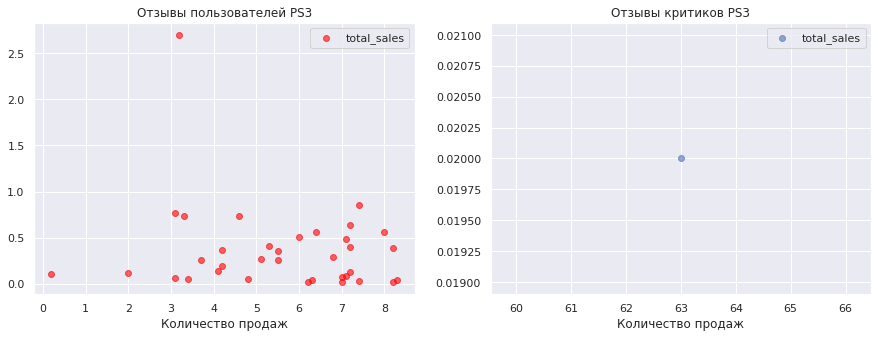

In [43]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
colors = ['red']
ax[0].scatter(x='user_score', y='total_sales', data= ps3, c = colors,alpha=0.6)
ax[0].set_title('Отзывы пользователей PS3')
ax[0].set_xlabel('оценка пользователей')
ax[0].set_xlabel('Количество продаж')
ax[0].legend()

ax[1].scatter(x='critic_score', y='total_sales', data= ps3,alpha=0.6)
ax[1].set_title('Отзывы критиков PS3')
ax[1].set_xlabel('оценка пользователей')
ax[1].set_xlabel('Количество продаж')
ax[1].legend()
plt.show()

* Связь между продажами игр на платформе 'PS3' и отзывами юзеров **слабая отрицательная**
* Связь между продажами игр на платформе 'PS3' и отзывами критиков  **невозможно определить из за нехватки данных**

In [44]:
# Платформа PC 
pc = df_pl[df_pl['platform'] == 'PC']
pc['user_score'].corr(pc['total_sales'])

0.15038053045029076

In [45]:
pc['critic_score'].corr(pc['total_sales'])

0.3773317477241351

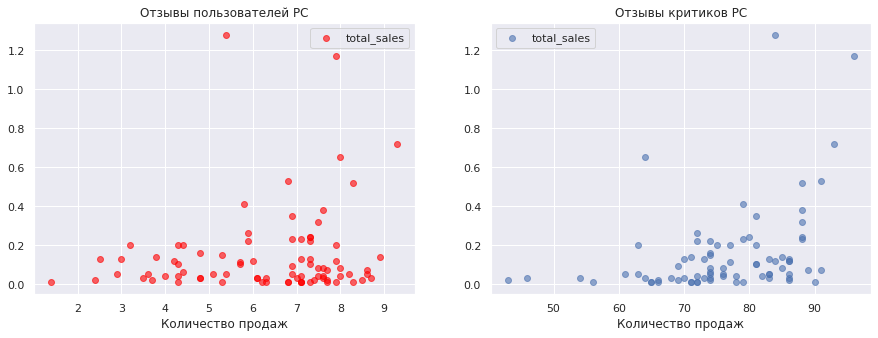

In [46]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
colors = ['red']
ax[0].scatter(x='user_score', y='total_sales', data= pc, c = colors,alpha=0.6)
ax[0].set_title('Отзывы пользователей PC')
ax[0].set_xlabel('оценка пользователей')
ax[0].set_xlabel('Количество продаж')
ax[0].legend()

ax[1].scatter(x='critic_score', y='total_sales', data= pc,alpha=0.6)
ax[1].set_title('Отзывы критиков PC')
ax[1].set_xlabel('оценка пользователей')
ax[1].set_xlabel('Количество продаж')
ax[1].legend()
plt.show()

* Связь между продажами игр на платформе 'PC' и отзывами юзеров **слабая положительная**
* Связь между продажами игр на платформе 'PC' и отзывами критиков  **средняя положительная**

_______________________________________________________________________________________________________________________________
* Корреляция показала, что оценка пользователей не влияет на продажи. Небольшая зависимость видна только на платформе WiiU . В остальных случаях она либо отсутствует совсем либо слабая.  
* Оценка критиков в большинстве не сильно влияет на продажи. Показатели в основном средние. На платформе 3DS слабая зависимость. Платформу PC изучить не удалось из за отсутствие данных.  

Получается, что покупатели больше ориентируются  на оценку критиков а не пользователей.


###  Общее распределение игр по жанрам

Text(0, 0.5, 'Количество продаж')

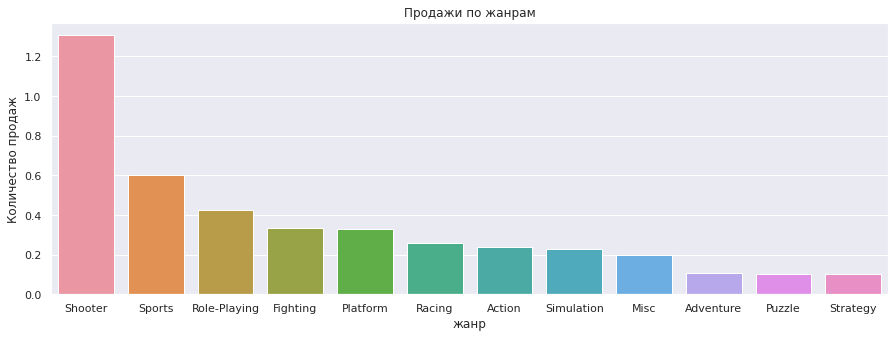

In [47]:
genre_sales = df_pl.pivot_table(index ='genre', values='total_sales', aggfunc='mean').sort_values(by='total_sales', ascending=False)
plt.figure(figsize=(15,5))
sns.barplot(x = genre_sales.index, y = genre_sales['total_sales'])
plt.title('Продажи по жанрам')
plt.xlabel('жанр')
plt.ylabel('Количество продаж')

In [48]:
genre_sales = df_pl.pivot_table(index ='genre', values='total_sales', aggfunc='mean').sort_values(by='total_sales', ascending=False)
genre_sales.head(5)

,total_sales
genre,
Shooter,1.31
Sports,0.60
Role-Playing,0.42
Fighting,0.33
Platform,0.33


Самым популярным жанром оказался Shooter, далее идут любители спорта Sports , Role-Playing на третьем месте, Fighting и Platform показали одинаковые результаты.  
Менее подвижные игры остались на последних рядах.


## **Составляем портрет пользователя каждого региона**

### Самые популярные платформы (топ-5).

In [49]:
# доля продаж по платфоpмам в каждом регионе.
top_5_pl = df_pl.pivot_table(index = 'platform', values= ['total_sales','na_sales','eu_sales','jp_sales'], aggfunc='sum').sort_values(by='total_sales', ascending=False)
top_5_pl = top_5_pl.reset_index().rename_axis(None, axis=1)

top_5_pl.head()

,platform,eu_sales,jp_sales,na_sales,total_sales
0,PS4,83.54,12.05,63.86,188.15
1,XOne,28.10,0.18,50.30,86.29
2,3DS,7.39,23.55,10.31,42.92
3,WiiU,6.49,4.12,8.86,20.95
4,PS3,7.30,4.97,5.66,20.42


In [50]:
top_5_pl = top_5_pl[top_5_pl['platform'].isin(['PS4','XOne','3DS','WiiU','PS3'])]


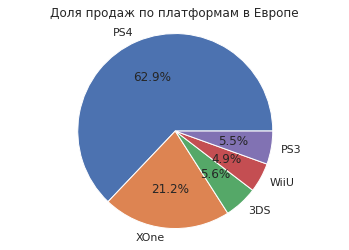

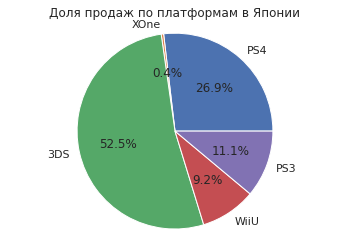

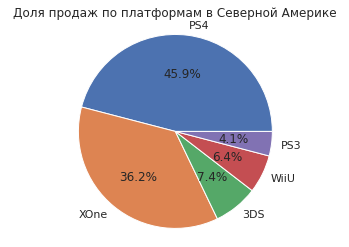

In [51]:
fig1, ax1 = plt.subplots()
ax1.pie(top_5_pl['eu_sales'],labels = top_5_pl['platform'],autopct='%1.1f%%')
ax1.axis('equal')  
plt.title('Доля продаж по платформам в Европе')

fig1, ax1 = plt.subplots()
ax1.pie(top_5_pl['jp_sales'],labels = top_5_pl['platform'],autopct='%1.1f%%')
ax1.axis('equal')  
plt.title('Доля продаж по платформам в Японии')

fig1, ax1 = plt.subplots()
ax1.pie(top_5_pl['na_sales'],labels = top_5_pl['platform'],autopct='%1.1f%%')
ax1.axis('equal')  
plt.title('Доля продаж по платформам в Северной Америке')

plt.show()

### Самые популярные жанры (топ-5).

In [52]:
#доля продаж по жанрам в каждом регионе.
top_genre = df_pl.pivot_table(index = 'genre', values=['total_sales','na_sales','eu_sales','jp_sales'], aggfunc='sum').sort_values(by='total_sales', ascending=False)
top_genre = top_genre.reset_index().rename_axis(None, axis=1)

top_genre.head()

,genre,eu_sales,jp_sales,na_sales,total_sales
0,Shooter,40.28,3.79,48.18,105.73
1,Action,34.82,23.05,33.68,102.13
2,Sports,27.82,1.65,26.31,64.33
3,Role-Playing,17.21,13.41,19.82,55.82
4,Misc,4.26,3.19,5.58,14.17


In [53]:
top_genre = top_genre[top_genre['genre'].isin(['Action','Sports','Shooter','Role-Playing','Platform'])]

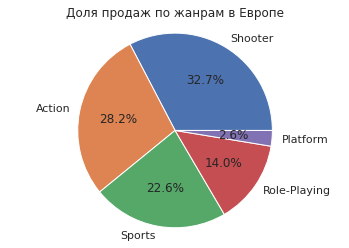

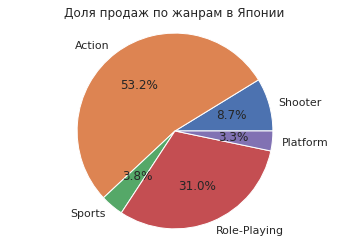

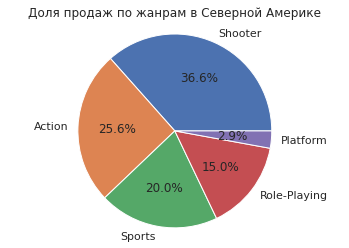

In [54]:
fig1, ax1 = plt.subplots()
ax1.pie(top_genre['eu_sales'],labels = top_genre['genre'],autopct='%1.1f%%')
ax1.axis('equal')
plt.title('Доля продаж по жанрам в Европе')

fig1, ax1 = plt.subplots()
ax1.pie(top_genre['jp_sales'],labels = top_genre['genre'],autopct='%1.1f%%')
ax1.axis('equal')
plt.title('Доля продаж по жанрам в Японии')

fig1, ax1 = plt.subplots()
ax1.pie(top_genre['na_sales'],labels = top_genre['genre'],autopct='%1.1f%%')
ax1.axis('equal')
plt.title('Доля продаж по жанрам в Северной Америке')

plt.show()

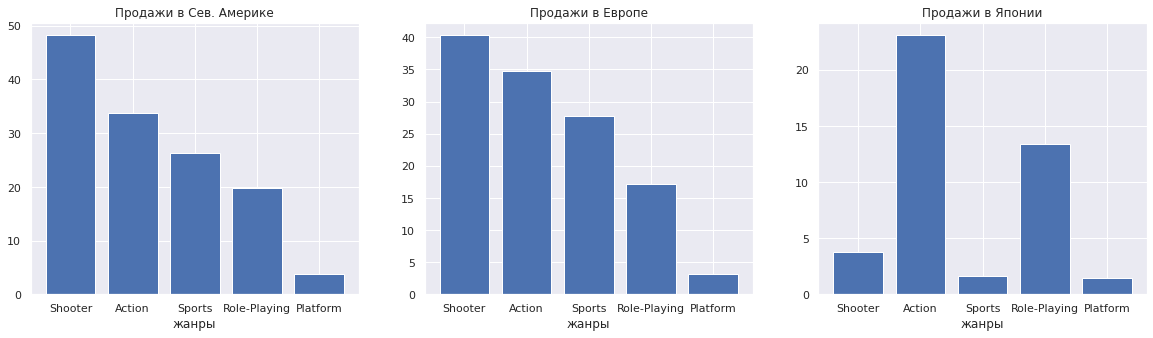

In [55]:
fig, axs = plt.subplots(1,3, figsize=(20, 5))

axs[0].bar(top_genre['genre'], top_genre['na_sales'])
axs[0].set_title('Продажи в Сев. Америке')
axs[0].set_xlabel('продажи ')
axs[0].set_xlabel('жанры')

axs[1].bar(top_genre['genre'], top_genre['eu_sales'])
axs[1].set_title('Продажи в Европе')
axs[1].set_xlabel('продажи ')
axs[1].set_xlabel('жанры')


axs[2].bar(top_genre['genre'], top_genre['jp_sales'])
axs[2].set_title('Продажи в Японии')
axs[2].set_xlabel('продажи ')
axs[2].set_xlabel('жанры')

plt.show()

### Pейтинг ESRB 

In [56]:
# Влияние рейтинга ESRB на продажи в отдельных регионах.
rating = df.pivot_table(index = 'rating', values=['total_sales','na_sales','eu_sales','jp_sales'], aggfunc='sum').sort_values(by='total_sales', ascending=False)
rating = rating.reset_index().rename_axis(None, axis=1)

# расшифруем рейтнги, чтоб иметь предстовление о чём идёт речь

def category(row):
    lemma = m.lemmatize(row['rating'])
    if 'no' in lemma:
        return 'Нет рейтинга'
    if 'E' in lemma:
        return 'Для всех'
    if 'T' in lemma :
        return 'Подросткам 13—19 лет'
    if 'M' in lemma:
        return 'От 17 лет'
    if 'E10' in lemma:
        return 'Для всех старше 10 лет'
    if 'K' in lemma:
        return 'Для детей и взрослых'
    if 'AO' in lemma :
        return 'Только для взрослых'
    if 'EC' in lemma:
        return 'Для детей младшего возраста'
    if 'RP' in lemma:
        return 'Рейтинг ожидается'
rating['decryption'] = rating.apply(category, axis=1)
display(rating)

,rating,eu_sales,jp_sales,na_sales,total_sales,decryption
0,no_rating,613.83,841.96,"1,242.46","2,849.33",Нет рейтинга
1,E,710.25,198.11,"1,292.99","2,435.52",Для всех
2,T,427.03,151.40,759.75,"1,493.35",Подросткам 13—19 лет
3,M,483.97,64.24,748.48,"1,473.79",От 17 лет
4,E10+,188.52,40.20,353.32,655.60,Для всех старше 10 лет
5,K-A,0.27,1.46,2.56,4.32,Для детей и взрослых
6,AO,0.61,0.00,1.26,1.96,Только для взрослых
7,EC,0.11,0.00,1.53,1.75,Для детей младшего возраста
8,RP,0.08,0.00,0.00,0.09,Рейтинг ожидается


**Европа** 

**Доли продажи по платформам**  
 1 - PS4 (62.9%)  
 2 - XOne(21.2%)  
 3 - 3DS(5.6%)  
 4 - PS3(5.5%)  
 5. WiiU(4.9%)  
**Доля продаж по жанрам**  
 1 - Shooter(32.7%)  
 2 - Action (28.2%)  
 3 - Sports (22.6%)  
 4 - Role-Playing(14.0%)  
 5 - Platform(2.6%)  
**Оценка критиков**
1. E – Для всех
2. no_rating - Нет рейтинга
3. М - От 17 лет
4. Т - Подросткам 13—19 лет
5. E10+ - Для всех старше 10 лет


**Япония**  

**Доли продажи по платформам**  
1 - 3DS(52.5%)  
2 -	PS4 (26.9%)  
3 -	PS3(11.1%)  
4 -	WiiU(9.2%)  
5 -	XOne(0.4%)  
**Доля продаж по жанрам**  
1 -	Action (53.2%)   
2 -	Role-Playing(31.0%)  
3 -	Shooter(8.7%)  
4 -	Sports (3.8%)  
5 -	Platform(3.3%)  
**Оценка критиков**
1. no_rating - Нет рейтинга
2. E – Для всех
3. Т - Подросткам 13—19 лет
4. М - От 17 лет
5. E10+ - Для всех старше 10 лет


**Северная Америка** 

**Продажи по платформам**  
1 -	PS4 (45.9%)  
2 -	XOne(36.2%)  
3 -	3 DS(7.4%)  
4 -	WiiU(6.4%)  
5 -	PS3(4.1%)  
**Доля продаж по жанрам**  
1 -	Shooter(36.6%)  
2 -	 Action (25.6%)  
3 -	Sports (20.0%)  
4 -	Role-Playing(15.0%)  
5 -	Platform(2.9%)  
**Оценка критиков**
1. E – Для всех
2. no_rating - Нет рейтинга
3. Т - Подросткам 13—19 лет
4. М - От 17 лет
5. E10+ - Для всех старше 10 лет


Показатели Европы и Северной Америки в целом схожи. Япония ,в силу своего особого менталитета и стандартизации , отличается от остальных регионов исследования 

## **Проверка гипотез**

### 1 Гипотеза

* Н1:Средние пользовательские рейтинги платформ Xbox One и PC **различаются** 
* Н0:Средние пользовательские рейтинги платформ Xbox One и PC **одинаковые**

In [57]:
XOne = df_pl[df_pl['platform'] =="XOne"]['user_score']
print('Дисперсия по платформе XOne:',XOne.std())

PC = df_pl[df_pl['platform'] =="PC"]['user_score']
print('Дисперсия по платформе PC:',PC.std())

Дисперсия по платформе XOne: 1.4580096059420473
Дисперсия по платформе PC: 1.7637888044331493


In [58]:
XOne_tmp = df.query('platform =="XOne" and user_score != "NaN" and year_of_release >2014')['user_score']

XOne_tmp

99       NaN
242     6.40
270     6.20
342      NaN
413     7.50
        ... 
16630   8.20
16643   6.60
16645    NaN
16660   6.70
16672    NaN
Name: user_score, Length: 167, dtype: float64

In [59]:
# дисперсии различаются, применяем equal_var = False
alpha = 0.01
results = st.ttest_ind(XOne.dropna(),PC.dropna(),equal_var = False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.2946308864003345
Не получилось отвергнуть нулевую гипотезу


Вывод:  
У нас нет оснований отвергать нулевую гипотезу, различия между выборками статичестически не значимы


In [60]:
# проверим результат работы с гипотезой
print('Среднее по платформе XOne:', XOne.mean())
print('Среднее по платформе PC :', PC.mean())

Среднее по платформе XOne: 6.542148760330578
Среднее по платформе PC : 6.296428571428573


### 2 Гипотеза

* H1:Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») **разные**.  
* H0:Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования»)  **одинаковы**

In [61]:
action = df_pl[df_pl['genre'] == "Action"]['user_score']
print('Дисперсия по жанру Action :',action.std())
sports = df_pl[df_pl['genre'] == "Sports"]['user_score']
print('Дисперсия по жанру Sports :',sports.std())

Дисперсия по жанру Action : 1.346497647740734
Дисперсия по жанру Sports : 1.967858640815406


In [62]:
# дисперсии различаются, применяем equal_var = False
alpha = 0.01
results = st.ttest_ind(action.dropna(),sports.dropna(),equal_var = False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 5.97163549920592e-10
Отвергаем нулевую гипотезу


Вывод:  
Отвергаем нулевую гипотезу, различия в выборках статистически значимы.


In [63]:
# проверим результат работы с гипотезой
print('Среднее по рейтенгу жанра action:', action.mean())
print('Среднее по рейтенгу жанра sports:', sports.mean())

Среднее по рейтенгу жанра action: 6.808290155440415
Среднее по рейтенгу жанра sports: 5.198780487804878


## Вывод:

Основной задачей проекта было определить закономерности, которые определяют успешность игр. Основные параметры, которыми мы оперировали это платформы, жанры, оценка юзеров и критиков, суммарные продажи и регионы.  
**Платформы**  
Самыми популярными платформами оказались PS4, XOne, WiiU, 3DS, PS3 . Доля популярности тех или иных платформ в Европе и северной Америке почти одинаковы. В Японии другая картина там популярностью пользуются(пользовались) портативные консоли 3DS.Но если четно в расчёт эту платформу я брать не стала бы, т.к этой платформа не актуальна и такой показатель объясняется самым большим жизненным циклом. Тут я бы поставила на первое место PS4.  

**Жанры**  
Выделили 5 популярных жанров Shooter, Action, Sports , Role-Playing, Platform. 
В предпочтениях к жанрам Европа и Северная Америка тоже сошлись во вкусах. На первом месте Shooter. 
Япония отличилась большой симпатией к Action

**Рейтинг ESRB**  
По рейтингу ESRB различия не большие. Но в целом выходит, что самые большие суммарные продажи приносят игры категории Е (Для всех). На втором месте игры без возрастного ограничения. Дальше идут Т,М,Е10+.

**Обобщим:  
Если брать данные за актуальный период (2014 - 2016г) по суммарным продажам, то здесь определяются лидеры то есть  игры для консолей ' PS4 ' и ' XOne ', в жанре Shooter и Action, без оценки ESRB или с рейтингом «Е»(для всех).  
Что касаемо влияния оценок критиков на суммарные продажи, то существуют платформы, где наблюдается умеренная связь. Оценки пользователь на продажи почти не влияют.**

